# Working with outliers

In [35]:
# Import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [58]:
# importing the dataset

visa = pd.read_csv("Visadataset.csv")
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# splitting dataset between categorical data and numerical data

num_cols = [i for i in visa.columns if visa[i].dtype != 'O']
cat_cols = [i for i in visa.columns if visa[i].dtype == 'O']
visa_cat = visa[cat_cols]
visa_num = visa[num_cols]

## Detecting outlier using boxplot

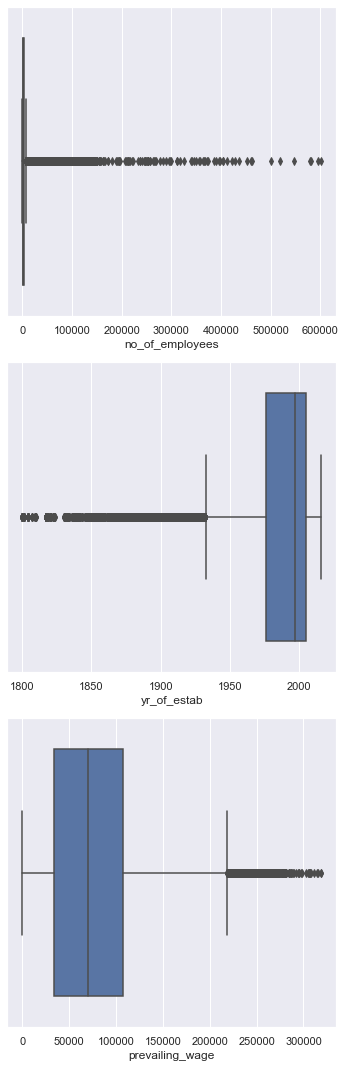

In [5]:
rows = 3
cols = 1
fig = plt.figure( figsize=(cols*5, rows*5))

for i, col in enumerate(visa_num.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = col, data=visa)
fig.tight_layout()  
plt.show()

## Detecting outliers using the Z-scores

In [8]:
# Function which will return the outliers from data

def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [24]:
# outliers in no_of_employees

no_of_employees_outliers = detect_outliers_zscore(visa.no_of_employees)
print("Outliers from Z-scores method: ", str(no_of_employees_outliers[0:30]) + ".....")
print("number of outliers", len(no_of_employees_outliers))

Outliers from Z-scores method:  [123876, 76638, 107535, 113282, 128431, 155999, 82716, 81379, 94411, 112102, 81849, 81762, 358352, 86050, 88484, 91879, 93759, 111654, 298041, 93018, 372064, 90533, 85646, 143036, 394921, 114273, 92872, 85457, 127586, 283641].....
number of outliers 429


In [22]:
# outliers in yr_of_estab

yr_of_estab_outliers = detect_outliers_zscore(visa.yr_of_estab)
print("Outliers from Z-scores method: ", str(yr_of_estab_outliers[:30]) + ".....")
print("number of outliers", len(yr_of_estab_outliers))

Outliers from Z-scores method:  [1847, 1838, 1818, 1839, 1801, 1843, 1850, 1847, 1838, 1851, 1849, 1848, 1852, 1847, 1851, 1852, 1834, 1801, 1800, 1846, 1838, 1838, 1817, 1841, 1821, 1846, 1817, 1851, 1834, 1852].....
number of outliers 695


In [23]:
# outliers in prevailing_wage

prevailing_wage_outliers = detect_outliers_zscore(visa.prevailing_wage)
print("Outliers from Z-scores method: ", str(prevailing_wage_outliers[:30]) + "....")
print("number of outliers", len(prevailing_wage_outliers))

Outliers from Z-scores method:  [247393.01, 269321.68, 238691.32, 235339.91, 256261.78, 262189.0, 250510.67, 256205.38, 233641.72, 274019.43, 246705.0, 240266.34, 254604.08, 288318.91, 244457.48, 242146.48, 247545.23, 234139.17, 239773.63, 237539.32, 266440.49, 277281.01, 275627.59, 249291.12, 292106.59, 234012.11, 247009.24, 267726.09, 280661.13, 277984.52]....
number of outliers 294


## Detecting outliers using the Inter Quantile Range(IQR)

In [13]:
# function for finding outliers using IQR

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [25]:
# outliers in no_of_employees using IQR

no_of_employees_outliers_iqr = detect_outliers_iqr(visa.no_of_employees)
print("Outliers from IQR method: ", str(no_of_employees_outliers_iqr[:30]) + "....")
print("number of outliers", len(no_of_employees_outliers_iqr))

Outliers from IQR method:  [7242, 7261, 7262, 7285, 7290, 7320, 7359, 7400, 7407, 7453, 7457, 7462, 7477, 7528, 7553, 7592, 7595, 7607, 7609, 7640, 7659, 7668, 7687, 7739, 7775, 7778, 7795, 7828, 7833, 7880]....
number of outliers 1556


In [26]:
# outliers in yr_of_estab using IQR

yr_of_estab_outliers_iqr = detect_outliers_iqr(visa.yr_of_estab)
print("Outliers from IQR method: ", str(yr_of_estab_outliers_iqr[:30]) + ".....")
print("number of outliers", len(yr_of_estab_outliers_iqr))

Outliers from IQR method:  [1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1800, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1801, 1804, 1804].....
number of outliers 3260


In [27]:
# outliers in prevailing_wage using IQR

prevailing_wage_outliers_iqr = detect_outliers_iqr(visa.prevailing_wage)
print("Outliers from IQR method: ", str(prevailing_wage_outliers_iqr[:30]) + ".....")
print("number of outliers", len(prevailing_wage_outliers_iqr))

Outliers from IQR method:  [218318.76, 218488.72, 218554.78, 218823.72, 218826.0, 218982.83, 219056.42, 219090.04, 219128.94, 219284.2, 219321.41, 219351.89, 219465.03, 219529.62, 219968.65, 220081.73, 220280.21, 220448.17, 220553.95, 220664.53, 220736.86, 220817.57, 221033.57, 221058.13, 221354.25, 221498.71, 221524.92, 221588.52, 221595.07, 221669.11].....
number of outliers 427


## Trimming/removing the outlier

In [38]:
# Now we will remove outliers using IQR

def outlier_index_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    index = np.where((data > upr_bound) & (data < lwr_bound))
    return index

In [39]:
def outlier_index_zscore(data):
    z = np.abs(stats.zscore(data))
    return np.where(z > 3)

In [73]:
# making array of all the outlies indexes

indexes = np.concatenate([outlier_index_zscore(visa.no_of_employees)[0], outlier_index_zscore(visa.prevailing_wage)[0], outlier_index_zscore(visa.yr_of_estab)[0]])

In [80]:
# making dataframe which do not conatins the outlies indexes

trimmed_visa = visa.loc[set(visa.index) - set(indexes)]

C:\Users\hitesh wadhwani\AppData\Local\Temp\ipykernel_1092\3279542722.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  trimmed_visa = visa.loc[set(visa.index) - set(indexes)]


In [81]:
trimmed_visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Quantile based flooring and capping

In [87]:
# flooring and capping on no_of_employees column

tenth_percentile = np.percentile(visa.no_of_employees, 10) # 10 percentile
ninetieth_percentile = np.percentile(visa.no_of_employees, 90) # 90 percentile
visa.no_of_employees = np.where(visa.no_of_employees < tenth_percentile, tenth_percentile, visa.no_of_employees)
visa.no_of_employees = np.where(visa.no_of_employees > ninetieth_percentile, ninetieth_percentile, visa.no_of_employees)

In [88]:
# skewness is removed it means extreme outlier are changed

visa.no_of_employees.skew()

0.42522202938114023

<AxesSubplot:>

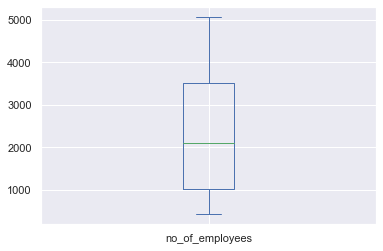

In [101]:
visa.no_of_employees.plot(kind='box')

In [98]:
# flooring and capping on yr_of_estab column

tenth_percentile = np.percentile(visa.yr_of_estab, 10) # 10 percentile
ninetieth_percentile = np.percentile(visa.yr_of_estab, 90) # 90 percentile
visa.yr_of_estab = np.where(visa.yr_of_estab < tenth_percentile, tenth_percentile, visa.yr_of_estab)
visa.yr_of_estab = np.where(visa.yr_of_estab > ninetieth_percentile, ninetieth_percentile, visa.yr_of_estab)

In [99]:
visa.yr_of_estab.skew()

-1.4136367381976644

<AxesSubplot:>

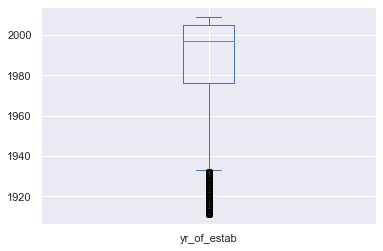

In [100]:
visa.yr_of_estab.plot(kind='box') #still some outliers are left which have to be handled

In [96]:
visa.prevailing_wage.skew()

0.02935738586977424

In [94]:
# flooring and capping on prevailing_wage column


tenth_percentile = np.percentile(visa.prevailing_wage, 10) # 10 percentile
ninetieth_percentile = np.percentile(visa.prevailing_wage, 90) # 90 percentile
visa.prevailing_wage = np.where(visa.prevailing_wage < tenth_percentile, tenth_percentile, visa.prevailing_wage)
visa.prevailing_wage = np.where(visa.prevailing_wage > ninetieth_percentile, ninetieth_percentile, visa.prevailing_wage)

<AxesSubplot:>

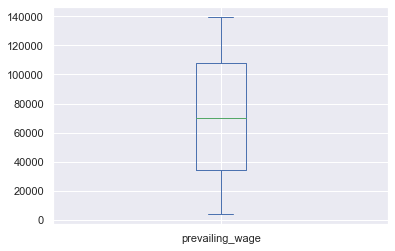

In [95]:
visa.prevailing_wage.plot(kind='box')

## Log Transformation

In [102]:
visa = pd.read_csv("Visadataset.csv")
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [103]:
visa.no_of_employees.skew()

12.265260077708275

In [104]:
# appling log function on no_of employees column

visa.no_of_employees = visa.no_of_employees.apply(lambda a: np.log(a) if a > 0 else 0)

In [105]:
visa.no_of_employees.skew()

-0.10596945432765449

In [106]:
visa.yr_of_estab = visa.yr_of_estab.apply(lambda a: np.log(a) if a > 0 else 0)
visa.prevailing_wage = visa.prevailing_wage.apply(lambda a: np.log(a) if a > 0 else 0)

## Replacing Outliers with Median Values


In [108]:
visa = pd.read_csv("Visadataset.csv")
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [109]:
visa.skew()

C:\Users\hitesh wadhwani\AppData\Local\Temp\ipykernel_1092\2980775665.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  visa.skew()


no_of_employees    12.265260
yr_of_estab        -2.037301
prevailing_wage     0.755776
dtype: float64

In [111]:
# replacing values greter than 95 percentile with median in no_of_employees

median = visa['no_of_employees'].quantile(0.50) # median of data 
x = visa['no_of_employees'].quantile(0.95) # 95 percentile of data
visa['no_of_employees'] = np.where(visa['no_of_employees'] > x, median, visa['no_of_employees'])

In [112]:
visa.no_of_employees.skew()

1.769522021084754